<a href="https://colab.research.google.com/github/RobertSloan22/FullStackDataScienceApplication/blob/main/CapstoneElective_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, LeakyReLU, BatchNormalization, Activation, LeakyReLU

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

**Let us check the version of tensorflow.**

In [ ]:

print(tf.__version__)


2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
import h5py

# Load the data
with h5py.File('/content/drive/My Drive/ElectiveProjects/svhn.h5', 'r') as hf:
    X_train = hf['X_train'][:]
    y_train = hf['y_train'][:]
    X_test = hf['X_test'][:]
    y_test = hf['y_test'][:]
hf.close()


Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

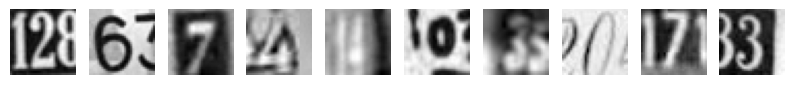

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Visualizing the first 10 images in the dataset and printing their labels

plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)

    plt.imshow(X_train[i], cmap = "gray")

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
print(X_train[1])

[[86.9591 87.0685 88.3735 ... 91.8014 89.7477 92.5302]
 [86.688  86.9114 87.4337 ... 90.7306 87.204  88.5629]
 [85.9654 85.8145 85.9239 ... 63.8626 59.8199 54.8805]
 ...
 [90.2236 91.0448 93.4637 ... 55.3535 48.5822 44.0557]
 [90.6427 90.4039 90.937  ... 78.2696 77.4977 74.27  ]
 [88.0236 88.1977 86.6709 ... 75.2206 76.6396 79.2865]]


In [ ]:
# Train Test Splitting of the Data
X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

In [ ]:
# Checking the Xtraining shape
X_train.shape

(42000, 1024)

### **Normalize the train and the test data**

In [ ]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0
X_test = X_test / 255.0

Print the shapes of Training and Test data

In [ ]:
# New shape

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


### **One-hot encode output**

In [ ]:
# One-hot encode output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# Test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
# Fixing the random seed generator to ensure random initilization numbers for weights
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

In [ ]:
# ANN Model
def nn_model_1():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(1024,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model



In [ ]:
# Build the model
model_1 = nn_model_1()

In [ ]:
# Print the summary of the model
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                65600     
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
history_model_1 = model_1.fit(X_train, y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=20)

Epoch 1/20
263/263 [==============================] - 3s 9ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 2s 9ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [==============================] - 1s 6ms/step - loss: 1.8679 - accuracy: 0.3405 - val_loss: 1.7779 - val_accuracy: 0.3869
Epoch 4/20
263/263 [==============================] - 1s 6ms/step - loss: 1.6573 - accuracy: 0.4391 - val_loss: 1.5288 - val_accuracy: 0.4907
Epoch 5/20
263/263 [==============================] - 2s 6ms/step - loss: 1.4635 - accuracy: 0.5180 - val_loss: 1.4202 - val_accuracy: 0.5255
Epoch 6/20
263/263 [==============================] - 2s 6ms/step - loss: 1.3588 - accuracy: 0.5568 - val_loss: 1.3240 - val_accuracy: 0.5768
Epoch 7/20
263/263 [==============================] - 3s 11ms/step - loss: 1.2895 - accuracy: 0.5839 - val_loss: 1.2558 - val_accuracy: 0.6013
Epoch

### **Plot the Training and Validation Accuracies and write down your Observations.**

Text(0, 0.5, 'Accuracy')

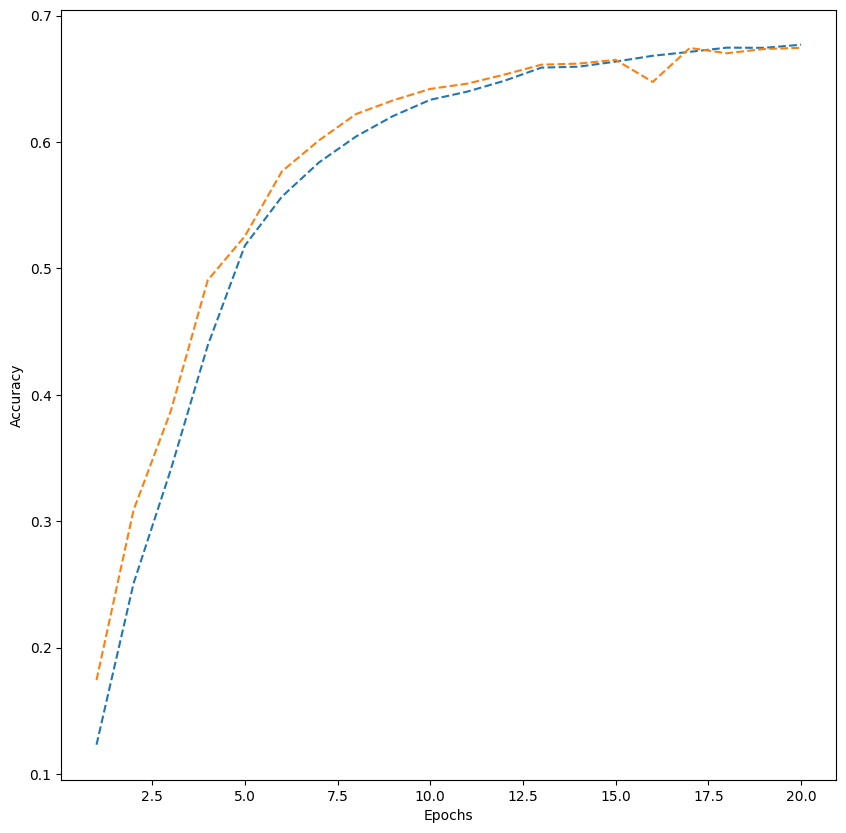

In [ ]:
dict_hist = history_model_1.history
list_ep = [ i for i in range(1, 21)]
plt.figure(figsize = (10, 10))
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


**Observations:_______**

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Fixing random seed generator before every new model
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
# New ANN Model 2
def nn_model2():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(1024,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build the model
model_2 = nn_model2()



In [ ]:
# Print the summary of the model
model_2.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 256)               262400    
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 64)                4160      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)              

In [ ]:
# Fit the model
history = model_2.fit(X_train, y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=30)

Epoch 1/30
263/263 [==============================] - 12s 36ms/step - loss: 2.3301 - accuracy: 0.1020 - val_loss: 2.3126 - val_accuracy: 0.0969
Epoch 2/30
263/263 [==============================] - 4s 17ms/step - loss: 2.3040 - accuracy: 0.1043 - val_loss: 2.3018 - val_accuracy: 0.1049
Epoch 3/30
263/263 [==============================] - 5s 19ms/step - loss: 2.1035 - accuracy: 0.2029 - val_loss: 1.9555 - val_accuracy: 0.2789
Epoch 4/30
263/263 [==============================] - 4s 17ms/step - loss: 1.6221 - accuracy: 0.4240 - val_loss: 1.5954 - val_accuracy: 0.4607
Epoch 5/30
263/263 [==============================] - 3s 12ms/step - loss: 1.3656 - accuracy: 0.5424 - val_loss: 1.2720 - val_accuracy: 0.5899
Epoch 6/30
263/263 [==============================] - 3s 12ms/step - loss: 1.1958 - accuracy: 0.6150 - val_loss: 1.1094 - val_accuracy: 0.6462
Epoch 7/30
263/263 [==============================] - 4s 14ms/step - loss: 1.1250 - accuracy: 0.6400 - val_loss: 1.0664 - val_accuracy: 0.654

### **Plot the Training and Validation Accuracies and write down your Observations.**

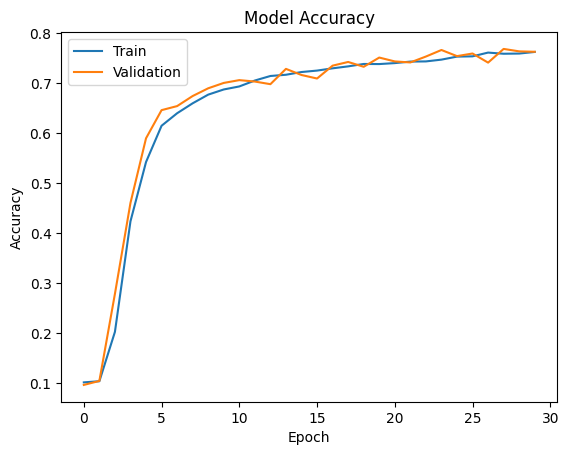

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:_______**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=1)

563/563 [==============================] - 2s 3ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
y_test = np.argmax(y_test, axis = -1)


### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

In [ ]:
# Import required library tools
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1814
           1       0.74      0.79      0.77      1828
           2       0.77      0.80      0.79      1803
           3       0.62      0.77      0.69      1719
           4       0.79      0.83      0.81      1812
           5       0.76      0.68      0.72      1768
           6       0.80      0.74      0.77      1832
           7       0.83      0.77      0.80      1808
           8       0.72      0.72      0.72      1812
           9       0.75      0.74      0.75      1804

    accuracy                           0.76     18000
   macro avg       0.76      0.76      0.76     18000
weighted avg       0.76      0.76      0.76     18000



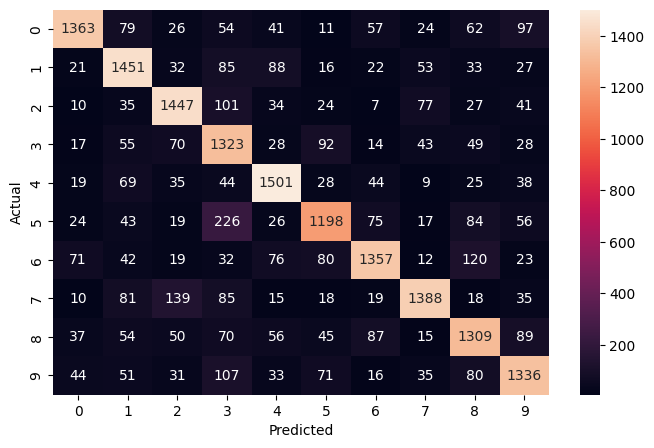

In [ ]:
# classification report
print(classification_report(y_test, test_pred))

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:__________**

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
import h5py


with h5py.File('/content/drive/My Drive/ElectiveProjects/svhn.h5', 'r') as hf:

  X_train = hf['X_train'][:]

  y_train = hf['y_train'][:]

  X_test = hf['X_test'][:]

  y_test = hf['y_test'][:]



hf.close()

Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**


There are 42,000 images in the training data and 18,000 images in the test dataset as expected.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
print('Shape:', X_train[0].shape)
print()
print("First:\n", X_train[0])

Shape: (32, 32)

First:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Print New shape of Training and Test

In [ ]:
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
np.random.seed(42)
import random

random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
def cnn_model_1():
  cnn_model_1 = Sequential()

  cnn_model_1.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32,32,1)))

  cnn_model_1.add(LeakyReLU(0.1))

  cnn_model_1.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = "same"))

  cnn_model_1.add(LeakyReLU(0.1))

  cnn_model_1.add(MaxPooling2D(pool_size = (2, 2)))

  cnn_model_1.add(Flatten())

  cnn_model_1.add(Dense(32))

  cnn_model_1.add(LeakyReLU(0.1))

  cnn_model_1.add(Dense(10, activation = 'softmax'))

  cnn_model_1.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics=['accuracy'])
  return cnn_model_1


In [ ]:
cnn_model_1 = cnn_model_1()

In [ ]:
cnn_model_1.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_31 (LeakyReLU)  (None, 32, 32, 16)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_32 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 8192)              0         
                                                     

In [ ]:
history_cnn_model_1 = cnn_model_1.fit(X_train, y_train, validation_split=0.2, batch_size=32, verbose=1, epochs=20)

Epoch 1/20
1050/1050 [==============================] - 102s 97ms/step - loss: 1.1274 - accuracy: 0.6303 - val_loss: 0.6497 - val_accuracy: 0.8087
Epoch 2/20
1050/1050 [==============================] - 105s 100ms/step - loss: 0.5352 - accuracy: 0.8475 - val_loss: 0.5254 - val_accuracy: 0.8448
Epoch 3/20
1050/1050 [==============================] - 108s 103ms/step - loss: 0.4416 - accuracy: 0.8700 - val_loss: 0.5049 - val_accuracy: 0.8532
Epoch 4/20
1050/1050 [==============================] - 117s 112ms/step - loss: 0.3781 - accuracy: 0.8888 - val_loss: 0.4486 - val_accuracy: 0.8739
Epoch 5/20
1050/1050 [==============================] - 115s 109ms/step - loss: 0.3330 - accuracy: 0.9004 - val_loss: 0.4592 - val_accuracy: 0.8717
Epoch 6/20
1050/1050 [==============================] - 89s 85ms/step - loss: 0.2944 - accuracy: 0.9115 - val_loss: 0.4640 - val_accuracy: 0.8735
Epoch 7/20
1050/1050 [==============================] - 90s 85ms/step - loss: 0.2622 - accuracy: 0.9216 - val_loss:

### **Plot the Training and Validation Accuracies and Write your observations.**

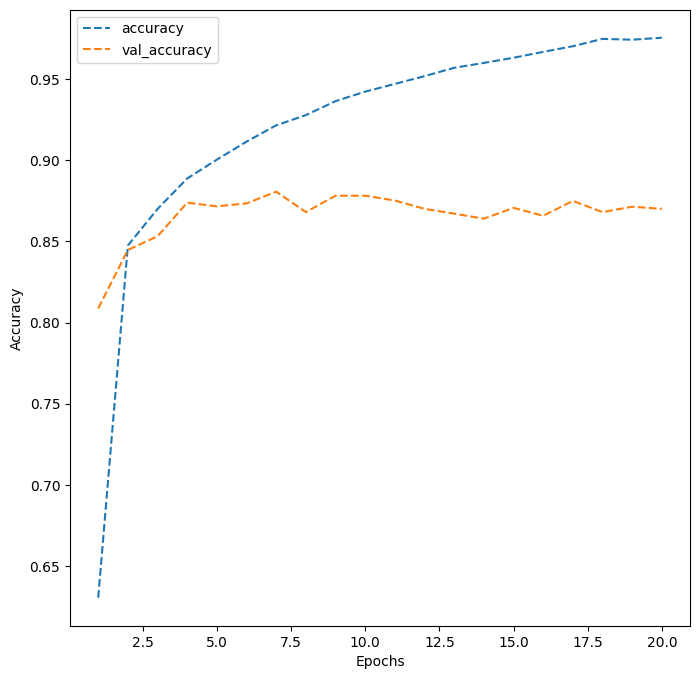

In [ ]:
# Plotting the accuracies

dict_hist = history_cnn_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()


**Observations:__________**

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
def cnn_model_2():
  cnn_model_2 = Sequential()

  cnn_model_2.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32,32,1)))

  cnn_model_2.add(LeakyReLU(0.1))

  cnn_model_2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = "same"))

  cnn_model_2.add(LeakyReLU(0.1))

  cnn_model_2.add(MaxPooling2D(pool_size = (2, 2)))

  cnn_model_2.add(BatchNormalization())

  cnn_model_2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = "same"))

  cnn_model_2.add(LeakyReLU(0.1))

  cnn_model_2.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same"))

  cnn_model_2.add(LeakyReLU(0.1))

  cnn_model_2.add(MaxPooling2D(pool_size = (2, 2)))

  cnn_model_2.add(BatchNormalization())

  cnn_model_2.add(Flatten())

  cnn_model_2.add(Dense(32))

  cnn_model_2.add(LeakyReLU(0.1))

  cnn_model_2.add(Dropout(0.5))

  cnn_model_2.add(Dense(10, activation = 'softmax'))

  cnn_model_2.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics=['accuracy'])
  return cnn_model_2


In [ ]:
cnn_model_2 = cnn_model_2()

In [ ]:
cnn_model_1.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_31 (LeakyReLU)  (None, 32, 32, 16)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_32 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 8192)              0         
                                                     

In [ ]:
history_cnn_model_2 = cnn_model_2.fit(X_train, y_train, validation_split=0.2, batch_size=32, verbose=1, epochs=30)

Epoch 1/30
1050/1050 [==============================] - 167s 159ms/step - loss: 0.9612 - accuracy: 0.6908 - val_loss: 0.7653 - val_accuracy: 0.7724
Epoch 2/30
1050/1050 [==============================] - 160s 152ms/step - loss: 0.6160 - accuracy: 0.8138 - val_loss: 0.4618 - val_accuracy: 0.8699
Epoch 3/30
1050/1050 [==============================] - 161s 153ms/step - loss: 0.5248 - accuracy: 0.8401 - val_loss: 0.4918 - val_accuracy: 0.8687
Epoch 4/30
1050/1050 [==============================] - 159s 152ms/step - loss: 0.4693 - accuracy: 0.8583 - val_loss: 0.3960 - val_accuracy: 0.8919
Epoch 5/30
1050/1050 [==============================] - 159s 151ms/step - loss: 0.4268 - accuracy: 0.8696 - val_loss: 0.4128 - val_accuracy: 0.8836
Epoch 6/30
1050/1050 [==============================] - 170s 162ms/step - loss: 0.3997 - accuracy: 0.8766 - val_loss: 0.4303 - val_accuracy: 0.8760
Epoch 7/30
1050/1050 [==============================] - 162s 154ms/step - loss: 0.3725 - accuracy: 0.8848 - val_

### **Plot the Training and Validation accuracies and write your observations.**

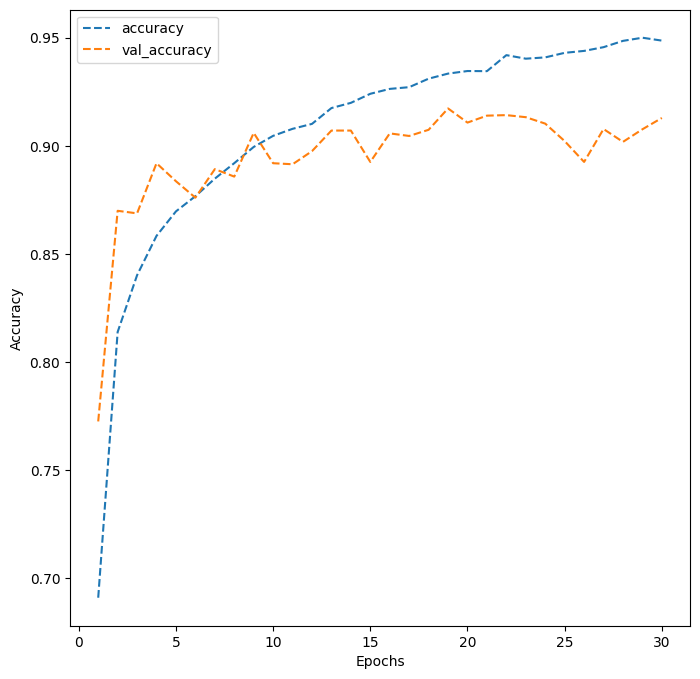

In [ ]:
# Plotting the accuracies

dict_hist = history_cnn_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:________**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
# Make prediction on the test data using model_2

test_pred = cnn_model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 36s 63ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
y_test = np.argmax(y_test, axis = -1)

### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1814
           1       0.94      0.88      0.91      1828
           2       0.92      0.93      0.92      1803
           3       0.88      0.88      0.88      1719
           4       0.93      0.94      0.93      1812
           5       0.91      0.92      0.91      1768
           6       0.90      0.92      0.91      1832
           7       0.94      0.92      0.93      1808
           8       0.91      0.90      0.91      1812
           9       0.90      0.92      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



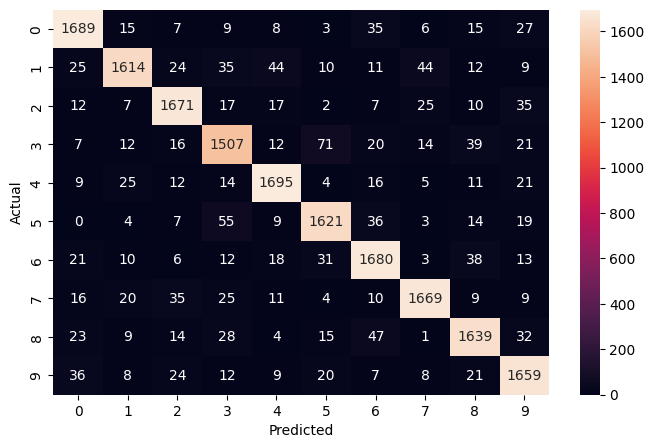

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:_________**